## Sentiment Analysis and Topic modelling of Victoria (Aus) Twitter Data  

## Table of Content
   
1. [Summary](#cell_summary)


2. [Data Exploration](#cell_exploration)


3. [Sentiment Analysis](#cell_sentiment)


4. [Topic Modeling](#cell_TopicModeling)

 
5. [Practical Implication](#cell_PracticalImplication)


<a id = "cell_summary"></a>
### 1. Summary
 

Coronavirus (COVID-19) is an infectious virus that has recently been found. Since its discovery in Wuhan, China, it has spread to almost every country in the world, and the World Health Organization (WHO) designated it a pandemic on March 11, 2020. It is highly contagious which is why it is very crucial to take adequate measures by any country to protect the well-being of its residents. 

The analysis in this report has been carried out to help Victorian Government to improve their public policies and management strategies. Nowadays, with increased popularity of social media among people it has become slightly easier to have access to the data where people conveys their opinions. Twitter is especially very helpful in this case becuase of the its increased use not only among the common population but also the celebrities and political leaders. The power of harnessing people's sentiments have been utilised in various context. This report would help Victorian government to further evaluate and gain insights into public's sentiments and would provide recommendations to take measures in response to the pandemic.

The following section of the report will cover <b>Data Exploration</b>, <b>Sentiment Analysis</b>, <b>Topic Modeling</b> and finally <b>Recommendations</b> are also provided.

The <b>Data Exploration</b> section dives into the details of which hour, day and month people in Victoria have tweeted the most. Then, it also provide insights about which hashtags and users are mentioned the most in their tweets. From the analysis, it was found that, the highest number of tweets are done during 11 am to 1pm hour of the day. Also, Sunday is the most popular day of the week for tweets and September saw a surge in the number of tweets. This also shows that the number of tweets has increased tremendously in the months when Victoria was under lockdown.

Further analysis in this section with hashtags and users mentioned in the tweets made it clear that people has increasingly showed both their sentiments through the use of hashtags. The most popular hashtags found are auspol, IStandWithDan, COVID19Vic, springst, COVID19, DictatorDan, ResignDanielAndrews. The mention of these hashtags has also been influenced by the number of COVID19 cases in Australia. Also, it was seen that among the 10 most mentioned users, seven are government officials or political leaders including the accounts DanielAndrewsMP, ScottMorrisonMP ,VictorianCHO, JennyMikakos, newbury3186, TimSmithMP, michaelobrienmp.

Third section introduces people's <b>Sentiment Analysis</b> towards these seven political leaders. Every leader has received a fair number of both positive and negative sentiments from Victorian residents. However, Daniel Andrews has been mentioned the most. Moreover, the time series plot shows how with the increase in the number of covid cases, the positive and negative sentiments have changed for the Premier of Victoria and Australian Prime minister. The proportion of positive sentiments have been higher for both the political leaders during the first covid19 wave. During the second covid19 wave, Australian Prime minister Scott Morison saw nearly equal number of positive and negative sentiment whereas Daniel Andrew's still had higher number of positive sentiments than negative.

The <b>Topic Modeling</b> section utilises the LDA techniques to explore topics in the tweets texts. Based on the analysis it was found that in total there are 33 topics in the tweets text which people have tweeted during this time period. Six topics among them are directly related to covid19. The time-series plot in this section clearly shows that the topics have been discussed more with the increase in the number of covid cases in Australia.

Finally, <b>recommendations</b> are provided to the Victorian government based on this analysis to take measure in order to maintain the well being of its people and to be successful in providing a safer and healthy state to everyone.

<a id = "cell_exploration"></a>
### 2. Data Exploration

In [58]:
#Importing libraries and packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from datetime import datetime
import seaborn as sns
from pytz import timezone 

#Load the Twitter Data 
df = pd.read_csv(r"./DataSets/Twitter_Data_VIC.csv", sep=",", na_values=['-','NA','NaN'," ", 'None'], header=0, index_col=None, encoding = 'ISO-8859-1', error_bad_lines=False)

In [35]:
df.head()

,User_ID,User_Location,Tweet_ID,Tweet_Time,Tweet_Text,HashTag,Retweet_Count,Like_Count,Source,User_Mentioned,Attachment_URL
0,O007paulchr,sydney australia,1.310000e+18,Fri Oct 02 05:00:54 +0000 2020,@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP Wh...,NaN,0,0.0,<a href= http://twitter.com/download/iphone r...,@SkyNewsAust @AnnastaciaMP @DanielAndrewsMP,NaN
1,O007paulchr,sydney australia,1.310000e+18,Sun Sep 27 06:32:09 +0000 2020,@SkyNewsAust @DanielAndrewsMP @RitaPanahi So w...,NaN,0,0.0,<a href= http://twitter.com/download/iphone r...,@SkyNewsAust @DanielAndrewsMP @RitaPanahi,NaN
2,O007paulchr,sydney australia,1.310000e+18,Wed Sep 16 08:32:13 +0000 2020,@SkyNewsAust @michaelobrienmp @DanielAndrewsMP...,NaN,0,0.0,<a href= http://twitter.com/download/iphone r...,@SkyNewsAust @michaelobrienmp @DanielAndrewsMP,NaN
3,O007paulchr,sydney australia,1.300000e+18,Sun Sep 06 05:45:36 +0000 2020,@SkyNewsAust @DanielAndrewsMP Hay Peta any com...,NaN,0,0.0,<a href= http://twitter.com/download/iphone r...,@SkyNewsAust @DanielAndrewsMP,NaN
4,O007paulchr,sydney australia,1.300000e+18,Tue Sep 01 10:41:13 +0000 2020,@SkyNewsAust @TimSmithMP @DanielAndrewsMP Tim ...,NaN,0,0.0,<a href= http://twitter.com/download/iphone r...,@SkyNewsAust @TimSmithMP @DanielAndrewsMP,NaN


In [36]:
#Checking which columns have NAs
Na_columns = df.columns[df.isna().any()].tolist()
  
#Calculating Percentage of NA records in each of the columns
print("\nNumber of NA records in the columns\n")
for column in Na_columns:
    print("{} : {:.2f}%".format(column,(df[column].isna().sum())*100/df.shape[0]))


Number of NA records in the columns

User_Location : 1.55%
HashTag : 86.59%
Retweet_Count : 10.52%
Like_Count : 11.14%
Source : 11.14%
User_Mentioned : 11.20%
Attachment_URL : 94.29%


In [37]:
#Converting UTC to Australian Time

converted = timezone('Australia/Melbourne')

df['Tweet_Time'] = df['Tweet_Time'].apply(lambda x: (datetime.strptime(x, "%a %b %d %H:%M:%S %z %Y")).astimezone(timezone('Australia/Melbourne')))

In [38]:
#Creating tweet Day, month and hour columns
    
df['Tweet_day'] = df['Tweet_Time'].apply(lambda x: x.strftime("%a"))
df['Tweet_month'] = df['Tweet_Time'].apply(lambda x: x.strftime("%b"))
df['Tweet_hour'] = df['Tweet_Time'].apply(lambda x: x.strftime("%H"))

#### Tweets Frequencies

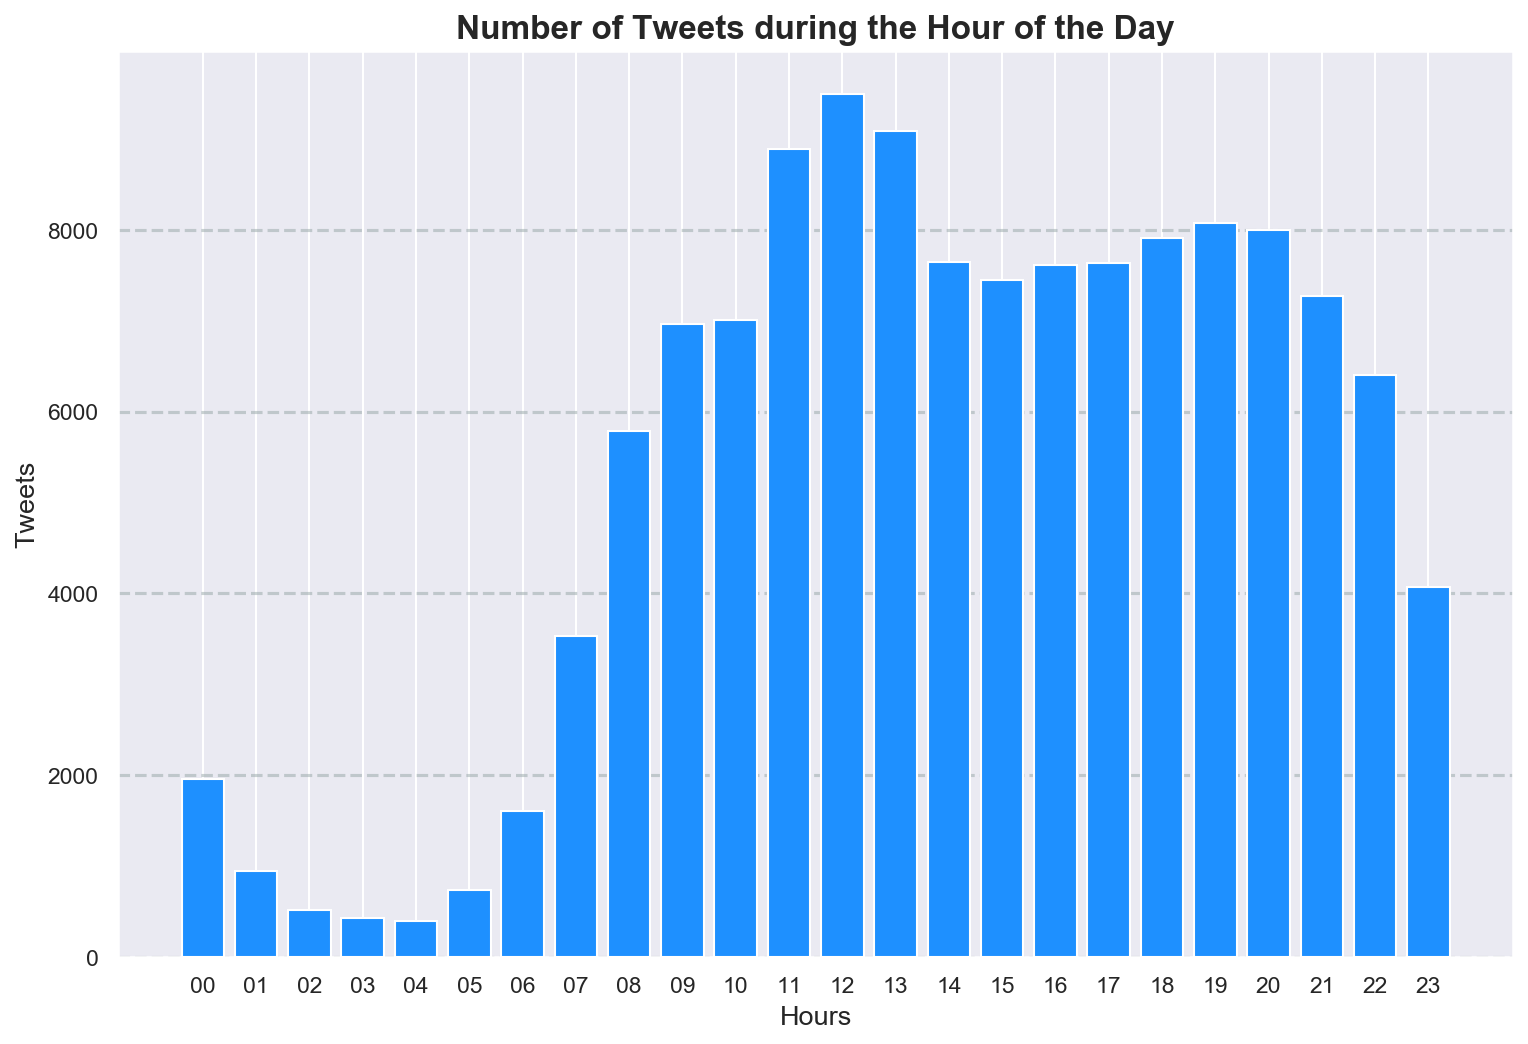

In [39]:
#Group the number of tweets for each hour using value_counts() method 
series = df['Tweet_hour'].value_counts() 
series2 = series.sort_index(axis=0, ascending=True)

#Bar chart of the number of Tweets during the hour of the day
sns.set()
plt.figure(figsize=(12,8), dpi=150)
plt.bar(series2.index,series2, color='dodgerblue', align='center')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1.5, axis='y', alpha=0.5)
plt.xlabel("Hours", fontsize=13)
plt.ylabel("Tweets", fontsize=13)
plt.title("Number of Tweets during the Hour of the Day", fontsize=16, fontweight='bold')
plt.savefig('TweetsPerHour.png',) #saving the file as png
plt.show()

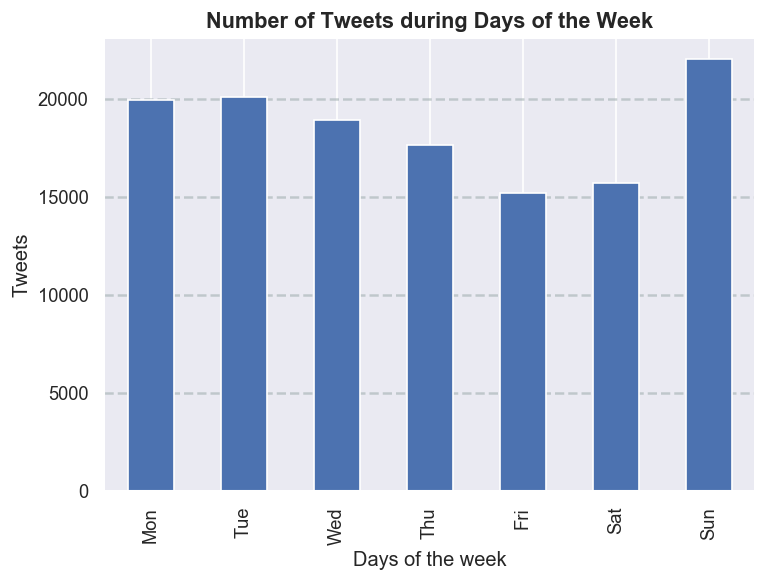

In [40]:
day_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

#Bar chart of the number of Tweets during the days of the week
sns.set()
plt.figure(figsize=(7,5), dpi=120)
series = df['Tweet_day'].value_counts().loc[day_order].plot(kind="bar", legend=False)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1.5, axis='y', alpha=0.5)
plt.xlabel("Days of the week", fontsize=12)
plt.ylabel("Tweets", fontsize=12)
plt.title("Number of Tweets during Days of the Week", fontsize=13, fontweight='bold')
plt.savefig('TweetsDayofWeek.png',) #saving the file as png
plt.show()

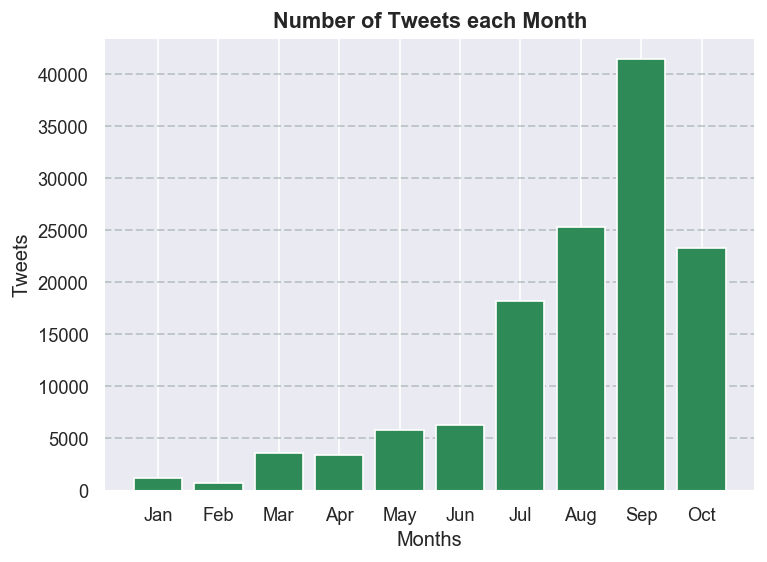

In [44]:
#Month wise tweets analysis
df_monthly = df.copy()
df_monthly.set_index(df_monthly['Tweet_Time'],inplace=True)
df_monthly = df_monthly.resample('M').count()
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']

#Bar chart of the number of Tweets each month
sns.set()
plt.figure(figsize=(7,5), dpi=120)
plt.bar(months,df_monthly['Tweet_month'], color='seagreen', align='center')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1.2, axis='y', alpha=0.5)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Tweets", fontsize=12)
plt.title("Number of Tweets each Month", fontsize=13, fontweight='bold')
plt.savefig('TweetsEveryMonth.png',) #saving the file as png
plt.show()

#### Popular HashTags

In [45]:
#Remove #from the hashtags
hashtags = df['HashTag'].dropna()
hashtags = hashtags.str.split()
tags = []
for hashtag in hashtags:
    for i in range(0,len(hashtag)):
        if hashtag[i][0:1] =="#":                #Cleaning the tags which are not hastags
            tags.append(hashtag[i][1:])

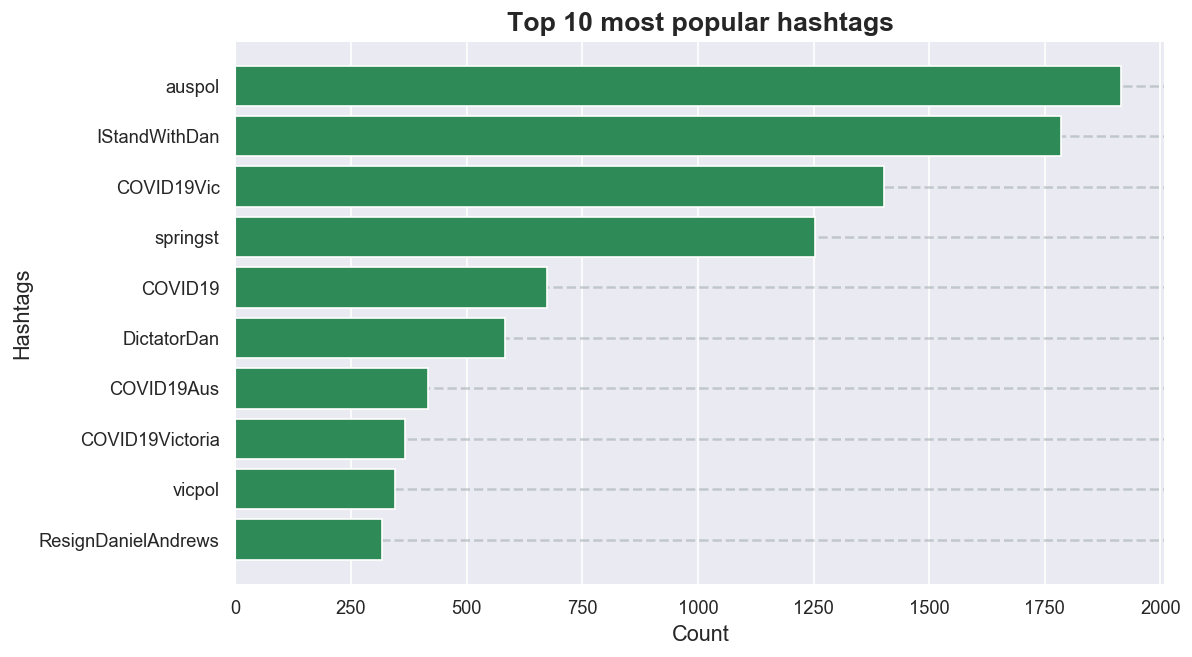

In [46]:
#Popular Hashtags
nptags = np.array(tags)
top10_tags = pd.value_counts(nptags)[0:10]
top10_tags_labels = top10_tags.index.tolist()
top10_tags

df_tags = pd.DataFrame({'Tag':top10_tags_labels, 'Count':top10_tags.values}, index=None)
df_tags = df_tags.sort_values('Count')

sns.set()
plt.figure(figsize=(10,6), dpi=120)
plt.barh(df_tags['Tag'],df_tags['Count'], color='seagreen', align='center')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1.5, axis='y', alpha=0.5)
plt.xlabel("Count", fontsize=13)
plt.ylabel("Hashtags", fontsize=13)
plt.title("Top 10 most popular hashtags", fontsize=16, fontweight='bold')
plt.show()

<p>The chart above shows the Top 10 most popular hashtags in the tweets. These top 10 hashtags are #auspol, #IStandWithDan, #COVID19Vic, #springst, #COVID19, #DictatorDan, #COVID19Aus, #COVID19Victoria, 
#vicpol, #ResignDanielAndrews</p>

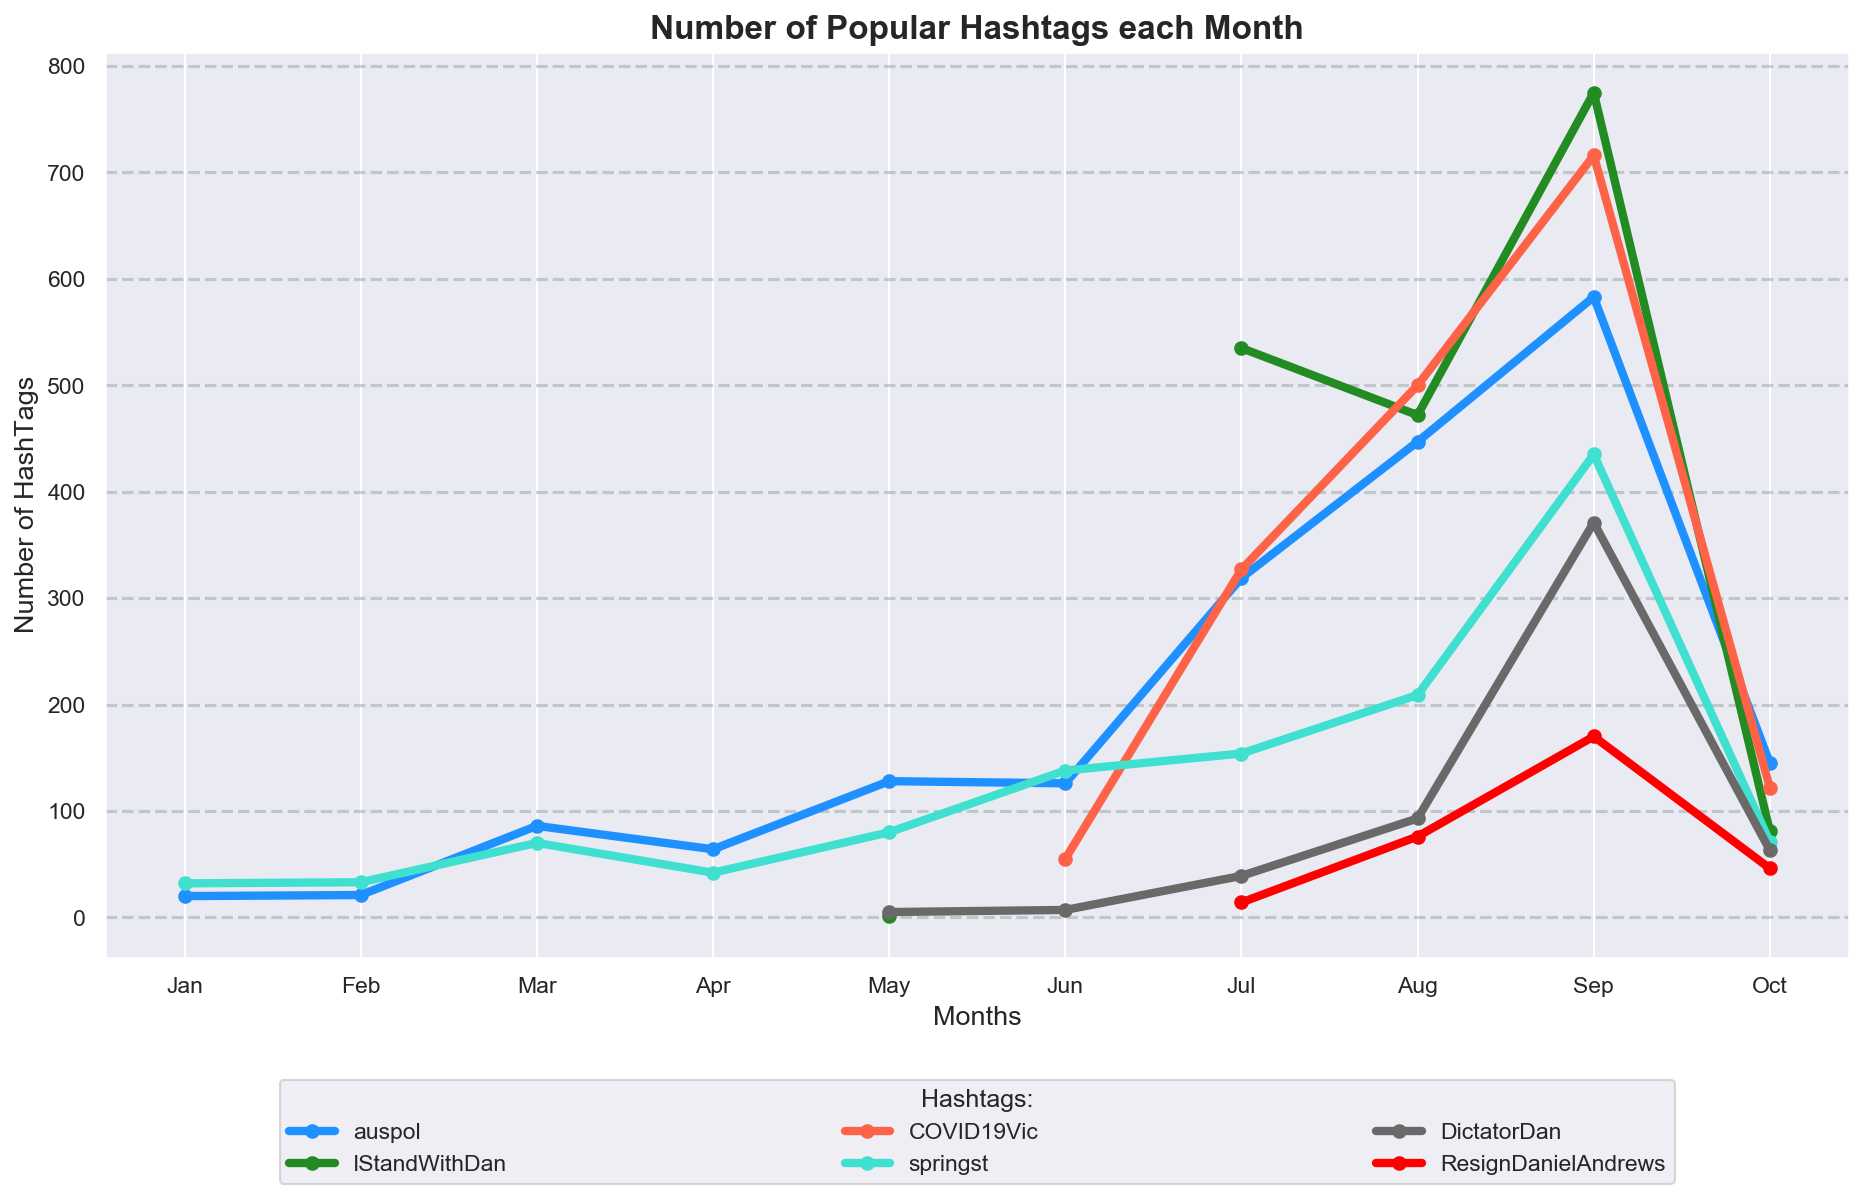

In [47]:
df_tags = {}
value_counts = {}
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for tag in top10_tags_labels:
    df_tags[tag] = df[df['HashTag'].str.contains(tag, na=False)]
    value_counts[tag] = df_tags[tag]['Tweet_month'].value_counts()
    value_counts[tag] = value_counts[tag].reindex(months)

plt.figure(figsize=(15,8), dpi=150)
plt.plot(value_counts['auspol'].keys(),value_counts['auspol'].values, marker='o', markerfacecolor='dodgerblue', markersize=6, color='dodgerblue', linewidth=4, label = 'auspol')
plt.plot(value_counts['IStandWithDan'].keys(),value_counts['IStandWithDan'].values, marker='o', markerfacecolor='forestgreen', markersize=6, color='forestgreen', linewidth=4, label = 'IStandWithDan')
plt.plot(value_counts['COVID19Vic'].keys(),value_counts['COVID19Vic'].values, marker='o', markerfacecolor='tomato', markersize=6, color='tomato', linewidth=4, label = 'COVID19Vic')
plt.plot(value_counts['springst'].keys(),value_counts['springst'].values, marker='o', markerfacecolor='turquoise', markersize=6, color='turquoise', linewidth=4, label = 'springst')
plt.plot(value_counts['DictatorDan'].keys(),value_counts['DictatorDan'].values, marker='o', markerfacecolor='dimgray', markersize=6, color='dimgray', linewidth=4, label = 'DictatorDan')
plt.plot(value_counts['ResignDanielAndrews'].keys(),value_counts['ResignDanielAndrews'].values, marker='o', markerfacecolor='red', markersize=6, color='red', linewidth=4, label = 'ResignDanielAndrews')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1.5, axis='y', alpha=0.5)
plt.legend(title = "Hashtags:", loc=8, bbox_to_anchor=(0.1, -.250, 0.8, -.102), ncol=3, mode="expand", borderaxespad=0.)
plt.xlabel("Months", fontsize=13)
plt.ylabel("Number of HashTags", fontsize=13)
plt.title("Number of Popular Hashtags each Month", fontsize=16, fontweight='bold')
plt.show()

The above plot shows how these popular hashtags has changed over months. The color combination has also been selected in a way to match the sentiment with the Hashtag. Also, it can be seen that the trend of these hashtags somewhat follows the trend seen in the COVID case in Australia.

#### Popular User Accounts

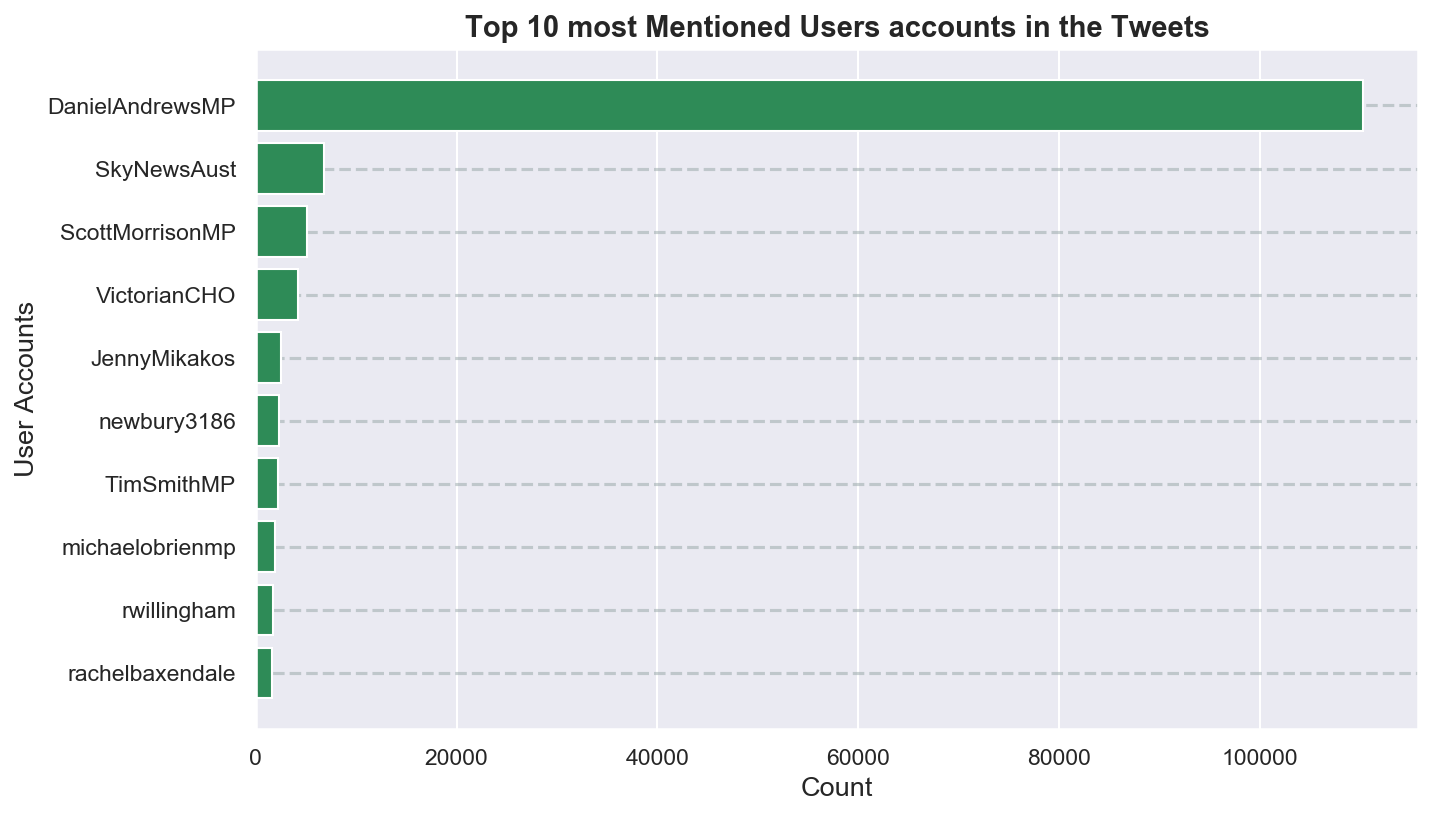

In [49]:
user_accounts = df['User_Mentioned'].dropna()

user_accounts = user_accounts.str.split()
users = []
for accounts in user_accounts:
    for i in range(0,len(accounts)):
        if accounts[i][0:1] =="@":                #Cleaning the accounts which are not @
            users.append(accounts[i][1:])

npusers = np.array(users)
top10_accounts = pd.value_counts(npusers)[0:10]

df_accounts = pd.DataFrame({'Account':top10_accounts.index.tolist(), 'Count':top10_accounts.values}, index=None)
df_accounts = df_accounts.sort_values('Count')

sns.set()
plt.figure(figsize=(10,6), dpi=150)
plt.barh(df_accounts['Account'],df_accounts['Count'], color='seagreen', align='center')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1.5, axis='y', alpha=0.5)
plt.xlabel("Count", fontsize=13)
plt.ylabel("User Accounts", fontsize=13)
plt.title("Top 10 most Mentioned Users accounts in the Tweets", fontsize=14, fontweight='bold')
plt.show()


<b> Following are the seven government official accounts among the top 10 Twitter’s user account mentioned in the public tweets.</b>

1. DanielAndrewsMP
2. ScottMorrisonMP
3. VictorianCHO
4. JennyMikakos
5. newbury3186
6. TimSmithMP
7. michaelobrienmp

<a id = "cell_sentiment"></a>
### 3. Sentiment Analysis

In [50]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Initialize an instance of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

officials_list = ['@DanielAndrewsMP','@ScottMorrisonMP','@VictorianCHO','@JennyMikakos', '@newbury3186', '@TimSmithMP', '@michaelobrienmp']
df_officials = df[df['User_Mentioned'].str.contains('|'.join(officials_list), na=False)].copy()

df_officials.reset_index(inplace = True)

Postive_sentiments = []  #To indicate positive sentiment.
Negative_sentiments = [] #To indicate negative sentiment.
Neutral_sentiments = [] #To indicate neutral sentiment.

for t in range(len(df_officials['Tweet_Text'])):
    tweet_text = df_officials['Tweet_Text'][t]
    # Compute Sentiment Score for each review
    SentimentScores = sid.polarity_scores(tweet_text) 
    # Generate sentiment index based on sentiment score, We set 0.3 as threshold for strong sentiments
    p=0
    n=0
    if SentimentScores['pos']> 0.2:
        Postive_sentiments.append(1)
        p=1
    else:
        Postive_sentiments.append(0)
      
    if SentimentScores['neg']> 0.2:
        Negative_sentiments.append(1)
        n=1
    else:
        Negative_sentiments.append(0)
    
    if (p+n)>=1:
        Neutral_sentiments.append(0)
    else:
        Neutral_sentiments.append(1)
    

df_officials['Senti_Positive'] = Postive_sentiments  
df_officials['Senti_Negative'] = Negative_sentiments
df_officials['Senti_Neutral'] = Neutral_sentiments

In [51]:
df_user_mentioned = {}
positive_counts = []
negative_counts = []
for user in officials_list:
    df_user_mentioned[user] = df_officials[df_officials['User_Mentioned'].str.contains(user, na=False)]
    positive_counts.append(df_user_mentioned[user]['Senti_Positive'].sum())
    negative_counts.append(df_user_mentioned[user]['Senti_Negative'].sum())

data = {'Political Leaders':officials_list, 'Positive Tweets':positive_counts, 'Negative Tweets':negative_counts}
sentiments_count = pd.DataFrame(data=data)
sentiments_count.head(7)

,Political Leaders,Positive Tweets,Negative Tweets
0,@DanielAndrewsMP,18707,15397
1,@ScottMorrisonMP,733,512
2,@VictorianCHO,716,442
3,@JennyMikakos,332,274
4,@newbury3186,354,365
5,@TimSmithMP,314,292
6,@michaelobrienmp,253,210


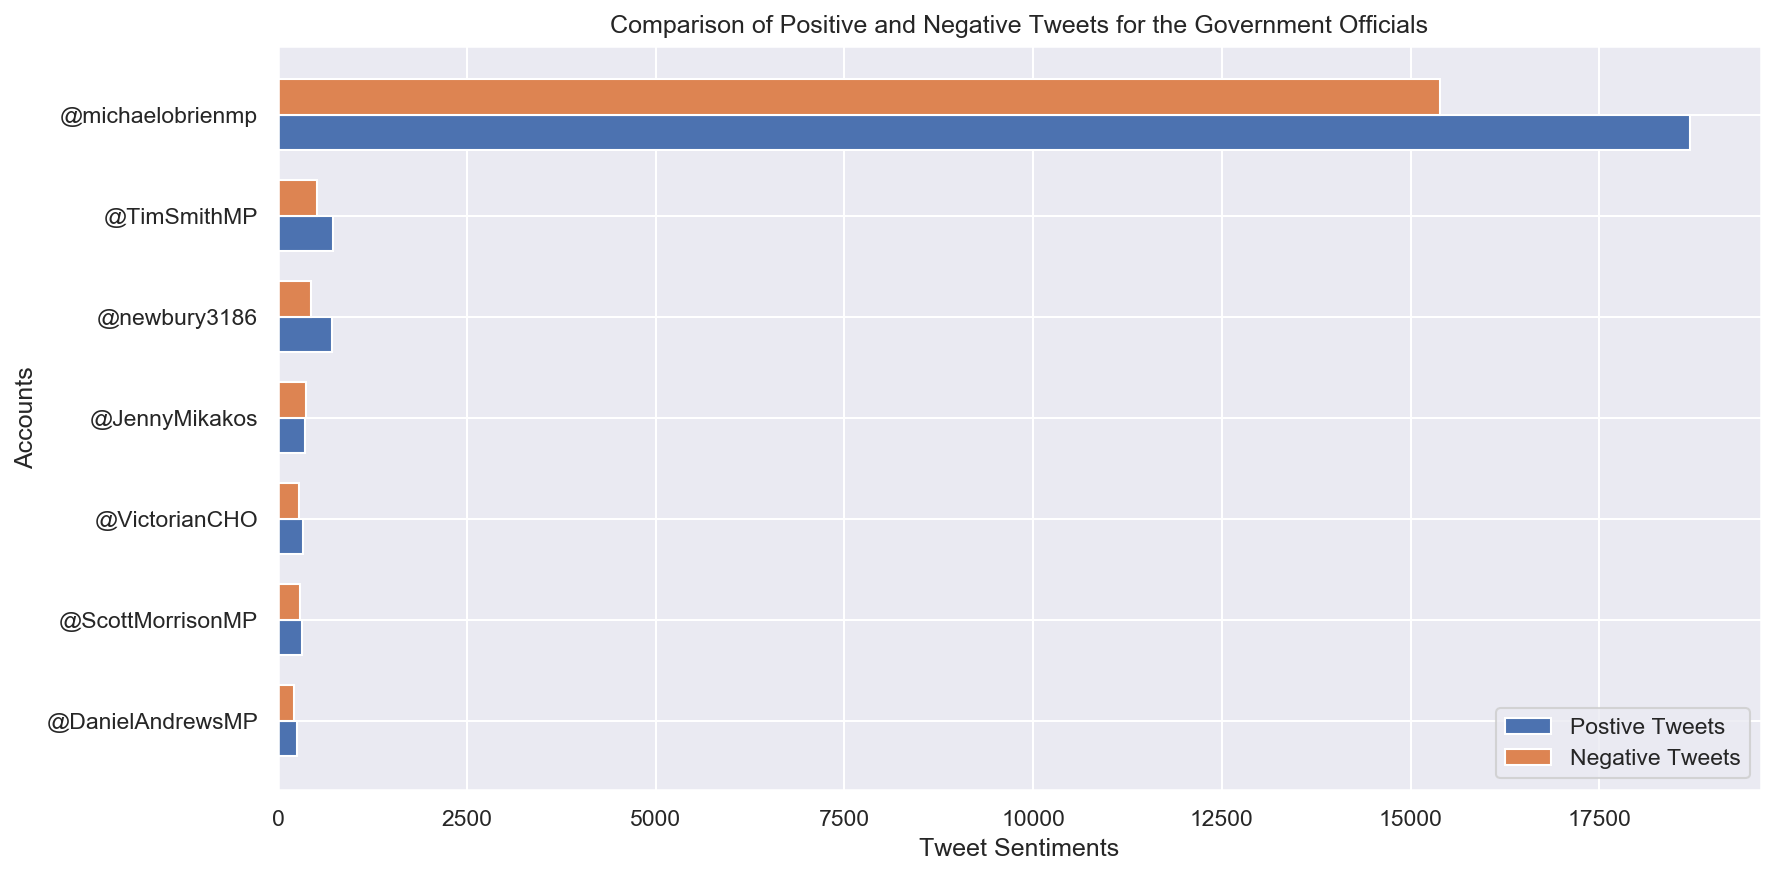

In [52]:
#Visualising the Positive/Negative tweets for user accounts

labels = sentiments_count['Political Leaders']
sentiments_count = sentiments_count.sort_values('Positive Tweets')

x = np.arange(len(sentiments_count['Political Leaders']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,6), dpi=150)
rects1 = ax.barh(x - width/2, sentiments_count['Positive Tweets'], width, label='Postive Tweets')
rects2 = ax.barh(x + width/2, sentiments_count['Negative Tweets'], width, label='Negative Tweets')

ax.set_ylabel('Accounts')
ax.set_xlabel('Tweet Sentiments')
ax.set_title('Comparison of Positive and Negative Tweets for the Government Officials')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend()
fig.tight_layout()

plt.show()

In [53]:
df_DanAnd = df_user_mentioned['@DanielAndrewsMP'].copy()
    
df_DanAnd['Tweet_Date'] = df_DanAnd['Tweet_Time'].apply(lambda x: x)

In [54]:
df_DanAnd = df_DanAnd[df_DanAnd['Tweet_Date']>="2020-01-25"]
df_DanAnd.sort_values(by='Tweet_Date').head()
df_DanAnd.set_index('Tweet_Date', inplace=True)
df_DanAnd_weekly = df_DanAnd.resample('W').sum()
df_DanAnd_weekly['sup_positive'] = df_DanAnd_weekly.apply(lambda x: round((x.Senti_Positive)/(x.Senti_Positive + x.Senti_Negative + x.Senti_Neutral),2), axis=1)
df_DanAnd_weekly['sup_negative'] = df_DanAnd_weekly.apply(lambda x: round((x.Senti_Negative)/(x.Senti_Positive + x.Senti_Negative + x.Senti_Neutral),2), axis=1)
min_senp = min(df_DanAnd_weekly['sup_positive'])
max_senp = max(df_DanAnd_weekly['sup_positive'])

min_senn = min(df_DanAnd_weekly['sup_negative'])
max_senn = max(df_DanAnd_weekly['sup_negative'])

df_DanAnd_weekly['norm_positive'] = df_DanAnd_weekly['sup_positive'].apply(lambda x: round((x-min_senp)/(max_senp-min_senp),2))
df_DanAnd_weekly['norm_negative'] = df_DanAnd_weekly['sup_negative'].apply(lambda x: round((x-min_senn)/(max_senn-min_senn),2))

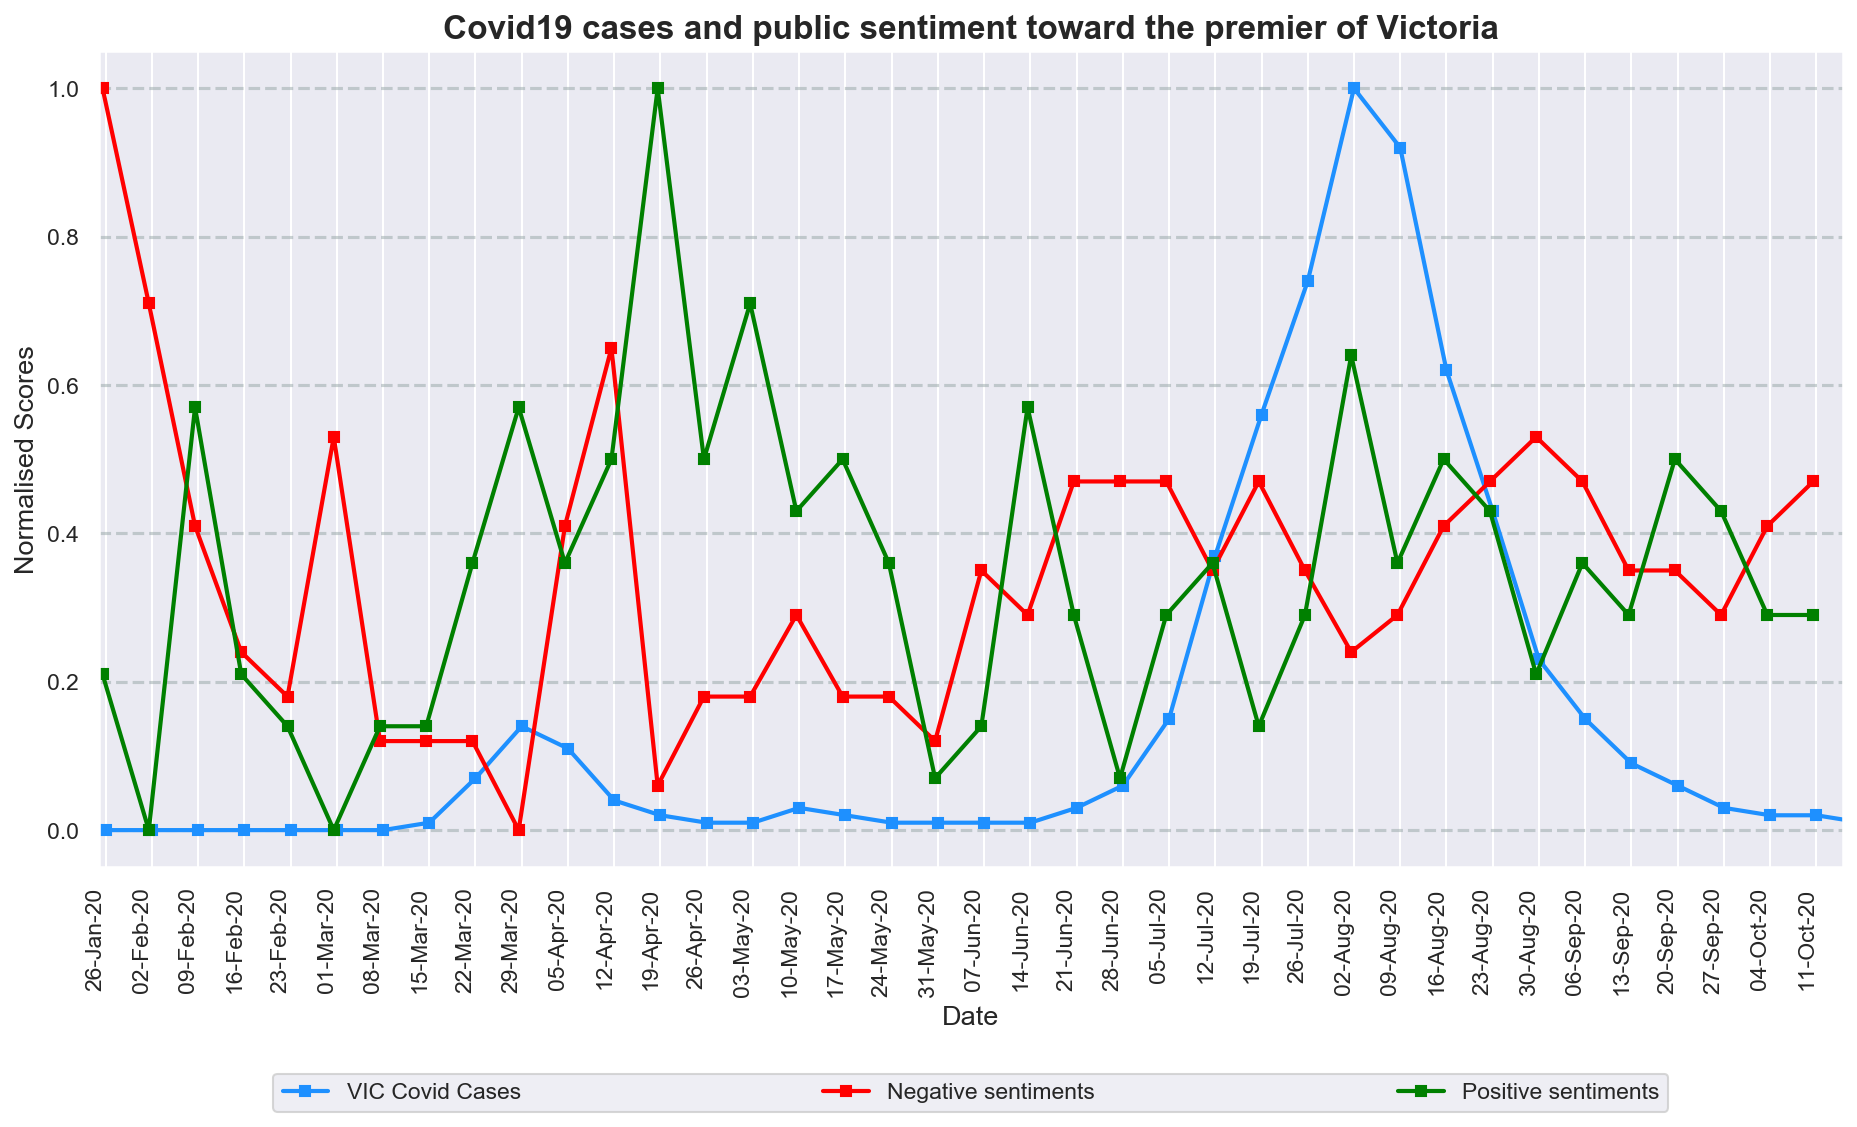

In [55]:
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator

df_covid = pd.read_csv(r"./DataSets/Covid19_Cases_VIC.csv", header=0, index_col=None)
fig, ax = plt.subplots(figsize=(15,8), dpi=150)

df_covid['Date'] = pd.to_datetime(df_covid['Date'], format="%d-%b-%y")

ax.set_xlim(df_covid['Date'][0], df_covid['Date'][len(df_covid)-1])
ax.xaxis.set_major_locator(DayLocator(interval=7))
ax.xaxis.set_major_formatter(DateFormatter('%d-%b-%y'))
ax.fmt_xdata = DateFormatter('%d-%b-%y')
fig.autofmt_xdate(rotation=90)

df_covid.set_index('Date', inplace=True)
df_weekly = df_covid.resample('W').sum()
min_cases = min(df_weekly['VIC'])
max_cases = max(df_weekly['VIC'])

df_weekly['norm_cases'] = df_weekly['VIC'].apply(lambda x: round((x-min_cases)/(max_cases-min_cases),2))

ax.plot(df_weekly.index,df_weekly['norm_cases'], marker='s', markerfacecolor='dodgerblue', markersize=5, color='dodgerblue', linewidth=2, label = 'VIC Covid Cases')
ax.plot(df_DanAnd_weekly.index,df_DanAnd_weekly['norm_negative'],marker='s', markerfacecolor='red', markersize=5, color='red', linewidth=2, label = 'Negative sentiments')
ax.plot(df_DanAnd_weekly.index,df_DanAnd_weekly['norm_positive'], marker='s', markerfacecolor='green', markersize=5, color='green', linewidth=2, label = 'Positive sentiments')
ax.grid(color='#95a5a6', linestyle='--', linewidth=1.5, axis='y', alpha=0.5)
ax.legend(loc=8, bbox_to_anchor=(0.1, -.300, 0.8, -.102), ncol=3, mode="expand", borderaxespad=0.)
plt.xlabel("Date", fontsize=13)
plt.ylabel("Normalised Scores", fontsize=13)
plt.title("Covid19 cases and public sentiment toward the premier of Victoria", fontsize=16, fontweight='bold')
plt.show()

The Time series chart shows that when the number of covid cases were at peak, positive sentiments in the tweets were higher than the negative sentiments towards the premier of Victoria (@DanielAndrewsMP). Also the postive sentiments also saw a rise during the peak times of 1st and 2nd wave of COVID-19.

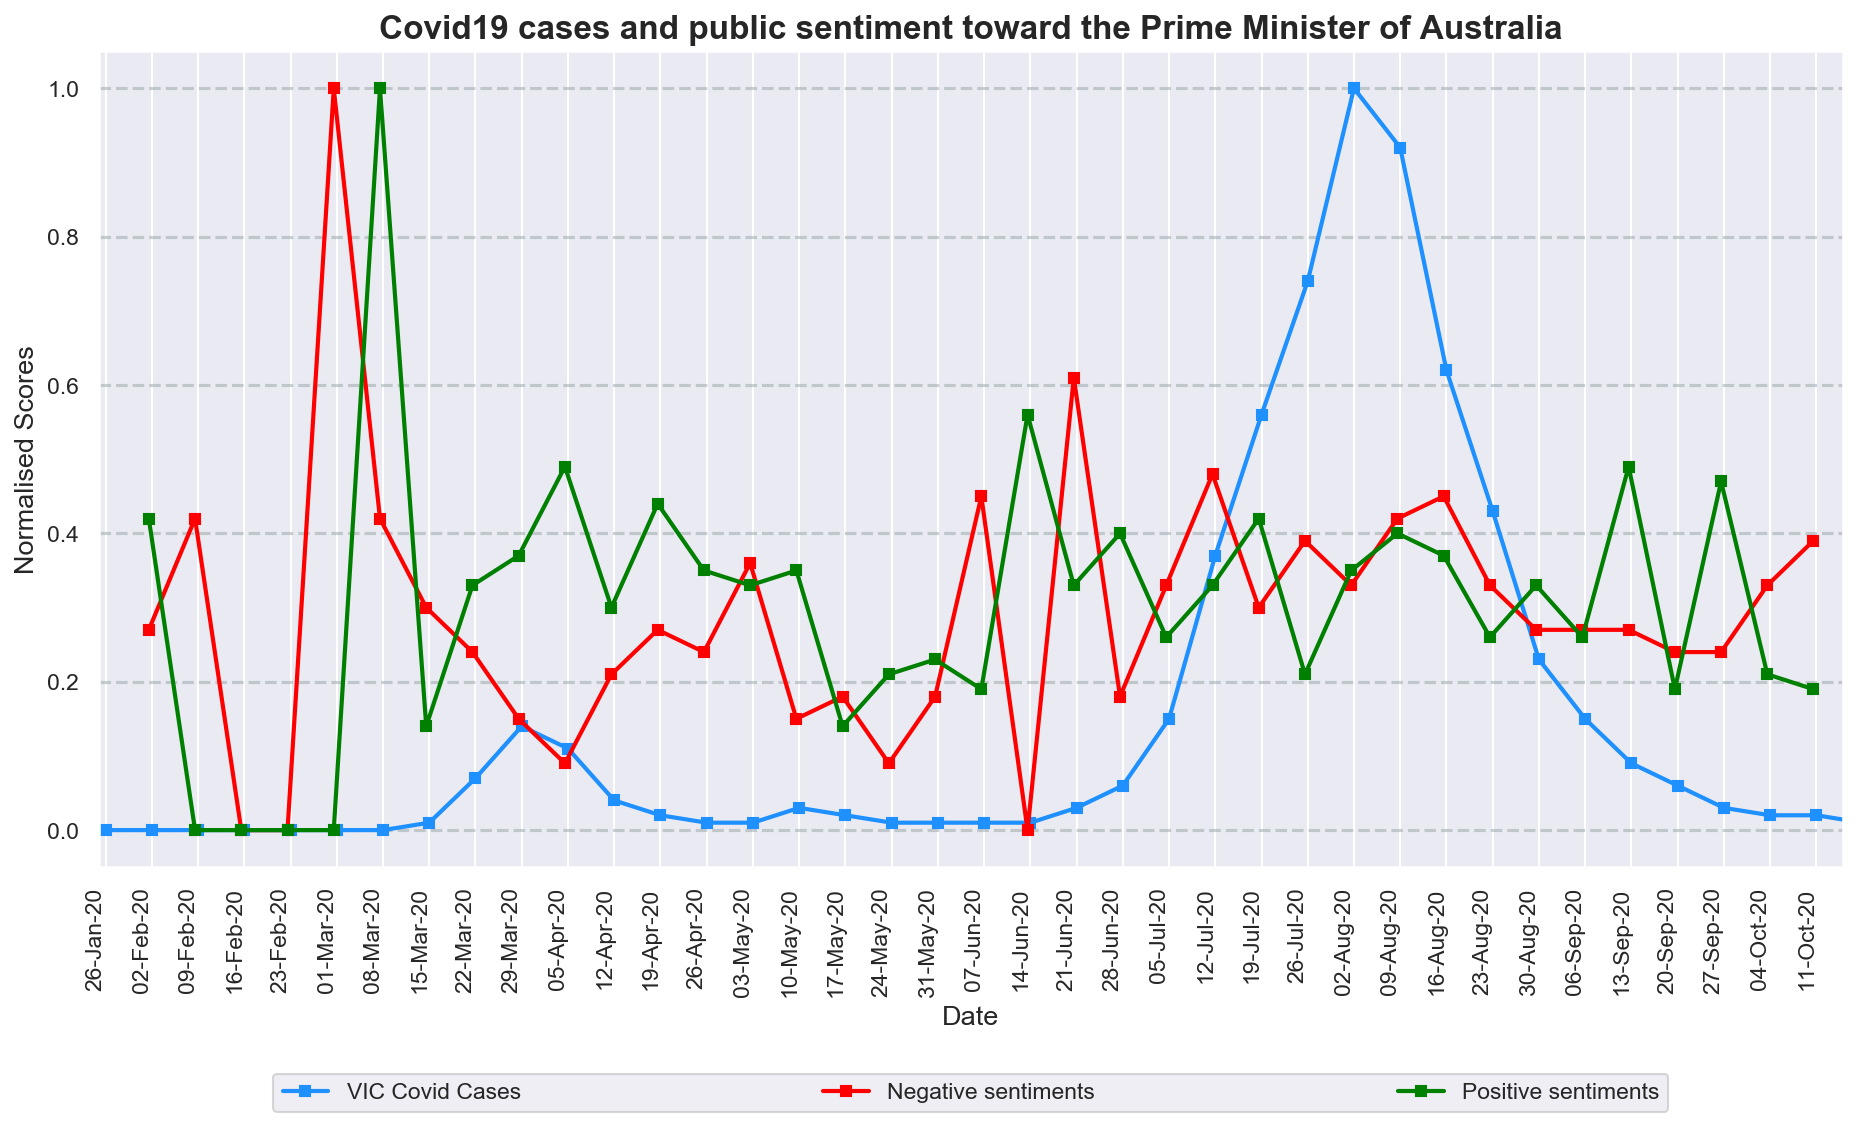

In [56]:
#Analysis for @ScottMorrisonMP
df_ScottM = df_user_mentioned['@ScottMorrisonMP'].copy()
    
df_ScottM['Tweet_Date'] = df_ScottM['Tweet_Time'].apply(lambda x: x)

df_ScottM = df_ScottM[df_ScottM['Tweet_Date']>="2020-01-25"]
df_ScottM.sort_values(by='Tweet_Date').head()
df_ScottM.set_index('Tweet_Date', inplace=True)
df_ScottM_weekly = df_ScottM.resample('W').sum()   #resampling into weekly data

#Normalising number of positive and negative tweets
df_ScottM_weekly['sup_positive'] = df_ScottM_weekly.apply(lambda x: round((x.Senti_Positive)/(x.Senti_Positive + x.Senti_Negative + x.Senti_Neutral),2), axis=1)
df_ScottM_weekly['sup_negative'] = df_ScottM_weekly.apply(lambda x: round((x.Senti_Negative)/(x.Senti_Positive + x.Senti_Negative + x.Senti_Neutral),2), axis=1)

#Min-Max Normalisation
min_senp = min(df_ScottM_weekly['sup_positive'])
max_senp = max(df_ScottM_weekly['sup_positive'])

min_senn = min(df_ScottM_weekly['sup_negative'])
max_senn = max(df_ScottM_weekly['sup_negative'])

df_ScottM_weekly['norm_positive'] = df_ScottM_weekly['sup_positive'].apply(lambda x: round((x-min_senp)/(max_senp-min_senp),2))
df_ScottM_weekly['norm_negative'] = df_ScottM_weekly['sup_negative'].apply(lambda x: round((x-min_senn)/(max_senn-min_senn),2))

df_covid = pd.read_csv(r"./DataSets/Covid19_Cases_VIC.csv", header=0, index_col=None)
fig, ax = plt.subplots(figsize=(15,8), dpi=150)

df_covid['Date'] = pd.to_datetime(df_covid['Date'], format="%d-%b-%y")

ax.set_xlim(df_covid['Date'][0], df_covid['Date'][len(df_covid)-1])
ax.xaxis.set_major_locator(DayLocator(interval=7))
ax.xaxis.set_major_formatter(DateFormatter('%d-%b-%y'))
ax.fmt_xdata = DateFormatter('%d-%b-%y')
fig.autofmt_xdate(rotation=90)

df_covid.set_index('Date', inplace=True)
df_weekly = df_covid.resample('W').sum()
min_cases = min(df_weekly['VIC'])
max_cases = max(df_weekly['VIC'])

df_weekly['norm_cases'] = df_weekly['VIC'].apply(lambda x: round((x-min_cases)/(max_cases-min_cases),2))

ax.plot(df_weekly.index,df_weekly['norm_cases'], marker='s', markerfacecolor='dodgerblue', markersize=5, color='dodgerblue', linewidth=2, label = 'VIC Covid Cases')
ax.plot(df_ScottM_weekly.index,df_ScottM_weekly['norm_negative'],marker='s', markerfacecolor='red', markersize=5, color='red', linewidth=2, label = 'Negative sentiments')
ax.plot(df_ScottM_weekly.index,df_ScottM_weekly['norm_positive'], marker='s', markerfacecolor='green', markersize=5, color='green', linewidth=2, label = 'Positive sentiments')
ax.grid(color='#95a5a6', linestyle='--', linewidth=1.5, axis='y', alpha=0.5)
ax.legend(loc=8, bbox_to_anchor=(0.1, -.300, 0.8, -.102), ncol=3, mode="expand", borderaxespad=0.)
plt.xlabel("Date", fontsize=13)
plt.ylabel("Normalised Scores", fontsize=13)
plt.title("Covid19 cases and public sentiment toward the Prime Minister of Australia", fontsize=16, fontweight='bold')
plt.show()

The Above chart clearly shows that during the first covid19 wave, the tweets with positive sentiments mentioning @ScottMorrisonMP increased and the negative sentiments decreased. However, during the second wave of covid19 in victoria, the number of positive and negative sentiment tweets for the Prime minister of Australia is almost similar. Moreover, the number of tweets with postive sentiments towards the PM increased when the number of cases started to decline.

<a id = "cell_TopicModeling"></a>
### 4. Topic Modeling

In [150]:
#This only needs to run once to install Gensim package
#Make sure that your computer is connected to the Internet
!pip install Cython
!pip install gensim

In [152]:
import nltk
from nltk.corpus import stopwords
import re  #Regular expression operation package

df_tweet = df['Tweet_Text']
Cleaned_doc = []
for t in range(len(df_tweet)):
    tweet = df_tweet[t]
    try:
        # removing everything except alphabets
        tweet = re.sub('[^A-Za-z]', ' ', tweet) 
        # make all text lowercase
        tweet = tweet.lower()
        # apply tokenization
        Tokens = tweet.split()
        # removing short words
        Filtered_token = [w for w in Tokens if len(w)>3] 
        tweet = ' '.join(Filtered_token)        
    except:
        continue
    #Save cleaned text
    Cleaned_doc.append(tweet)

In [153]:
#Extracting Nouns Only
is_noun = lambda pos: pos[:2] == 'NN'
for r in range(len(Cleaned_doc)):
    tokenized = nltk.word_tokenize(Cleaned_doc[r])
    nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]
    Cleaned_doc[r] = ' '.join(nouns)

In [222]:
#Removing Stop words
stop_words = stopwords.words('english')

# Remove Stop Words
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        if t not in stop_words:
             each_item.append(t)
    Cleaned_doc[r] = ' '.join(each_item)

In [154]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()# Fit and transform the processed titles

count_data = count_vectorizer.fit_transform(Cleaned_doc)

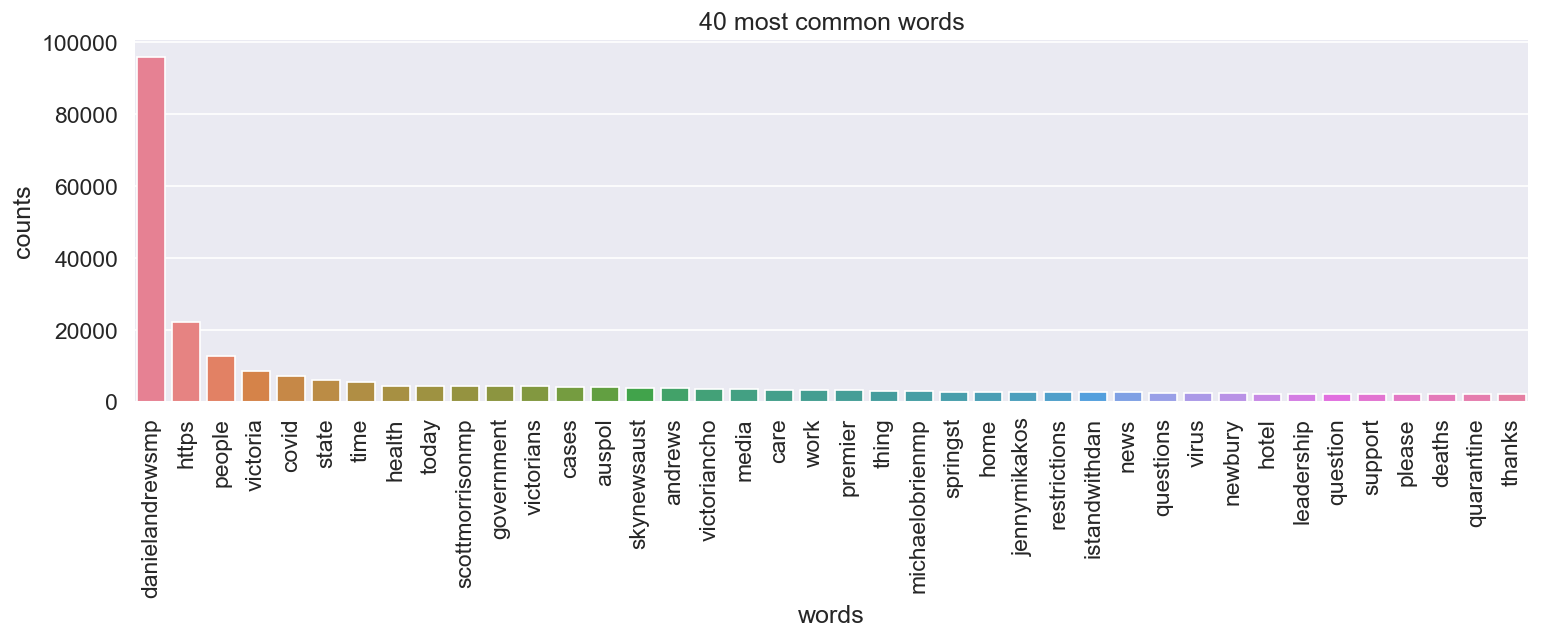

In [157]:
terms = count_vectorizer.get_feature_names()

# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]

count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:40] #Take the top 40 words
    
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))
    
plt.figure(2, figsize=(15, 4), dpi=120)
plt.subplot(title='40 most common words')
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.barplot(x_pos, counts, palette='husl')
plt.xticks(x_pos, words, rotation=90) 
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

In [158]:
#Remove highly frequent (Greater than 20%) and infrequent words (less than 1%)
keepIndex = [];
for t in range(len(total_counts)):
    if total_counts[t] < 5000 and total_counts[t] > 250:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

#Save the remain ing term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = count_data[:,keepIndex]

Number of Terms Remained:  554


In [160]:
Cleaned_doc_new = []
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        #Keep only terms included in ReducedTerm
        if t in ReducedTerm:
             each_item.append(t)
    Cleaned_doc_new.append(each_item)

In [162]:
import gensim.corpora as corpora

# Construct term dictionary in the format "Term : Index"
id2word = corpora.Dictionary(Cleaned_doc_new)
#Bag of Word Representation
Corpus = [id2word.doc2bow(text) for text in Cleaned_doc_new]

In [163]:
#Evaluation models with topics numbers from 2 to 50
import gensim
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from pprint import pprint#

Topics = list(range(2,50,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                               id2word=id2word,
                                               num_topics=top,
                                               random_state=100)
    #Keep the trained models
    Trained_Models.append(lda_model)
    #Compute coherence score for each model
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=Cleaned_doc_new, 
                                         dictionary=id2word, 
                                         coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    #Save and print the coherence scores 
    coherence_scores.append(coherence)

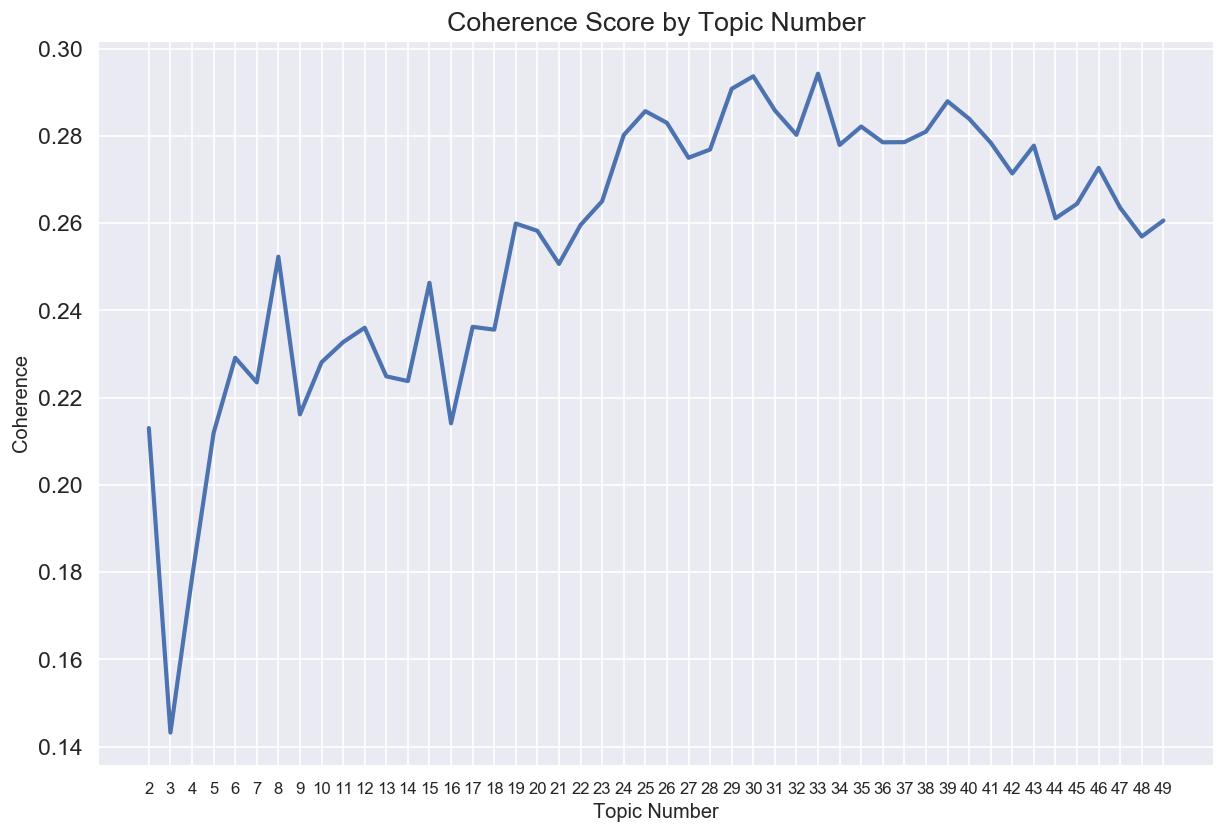

In [170]:
plt.figure(figsize=(12,8), dpi=120)
plt.plot(coherence_scores)
plt.xticks(range(0,len(Topics)),Topics, fontsize=10)
plt.title('Coherence Score by Topic Number', fontsize=16)
plt.xlabel('Topic Number', fontsize=12)
plt.ylabel('Coherence', fontsize=12)
plt.show()

In [173]:
import numpy
lda_model = Trained_Models[numpy.argmax(coherence_scores)]

#Show top 10 words in each topic
lda_model.show_topics(num_words=10)

[(15,
  '0.190*"vicgovdhhs" + 0.115*"leader" + 0.097*"country" + 0.097*"responsibility" + 0.074*"inquiry" + 0.035*"australians" + 0.031*"members" + 0.031*"princess" + 0.031*"drvyom" + 0.028*"failures"'),
 (30,
  '0.341*"skynewsaust" + 0.142*"support" + 0.118*"istandwithdan" + 0.080*"evidence" + 0.072*"timwilsonmp" + 0.053*"situation" + 0.031*"stand" + 0.029*"bullshit" + 0.021*"play" + 0.018*"lots"'),
 (8,
  '0.228*"scottmorrisonmp" + 0.088*"family" + 0.082*"plan" + 0.071*"truth" + 0.064*"joshfrydenberg" + 0.047*"answers" + 0.036*"annastaciamp" + 0.036*"wouldn" + 0.035*"disaster" + 0.035*"cathlandrews"'),
 (16,
  '0.194*"nothing" + 0.092*"reason" + 0.077*"part" + 0.074*"decision" + 0.071*"problem" + 0.068*"emergency" + 0.043*"policy" + 0.039*"game" + 0.038*"court" + 0.033*"breakfastnews"'),
 (25,
  '0.218*"thing" + 0.117*"business" + 0.070*"incompetence" + 0.058*"workers" + 0.058*"worldoracle" + 0.055*"face" + 0.051*"line" + 0.044*"health" + 0.043*"message" + 0.042*"issues"'),
 (11,
  '

In [174]:
#Retrieve the 5 most popular terms in each topic
for i, comp in enumerate(lda_model.get_topics()):
    terms_comp = zip(ReducedTerm, abs(comp))
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:5]
    print("Topic "+str(i+1)+": ")
    for t in sorted_terms:
        print(t[0], ':', '{0:.3f}'.format(t[1]))
    print(" ")

Topic 1: 
rachel : 0.205
comments : 0.182
game : 0.124
insidersabc : 0.118
evidence : 0.088
 
Topic 2: 
difficultnerd : 0.295
choice : 0.257
population : 0.093
drcraigemerson : 0.069
idea : 0.062
 
Topic 3: 
access : 0.239
mates : 0.155
lockdown : 0.116
newbury : 0.056
officer : 0.054
 
Topic 4: 
business : 0.149
kind : 0.139
campaign : 0.092
bullshit : 0.087
liberalvictoria : 0.084
 
Topic 5: 
actions : 0.365
reality : 0.151
break : 0.126
andrews : 0.094
hospital : 0.038
 
Topic 6: 
lockdowns : 0.283
recovery : 0.201
dictator : 0.096
recession : 0.085
stop : 0.075
 
Topic 7: 
attacks : 0.341
fire : 0.201
congratulations : 0.087
kids : 0.064
everything : 0.052
 
Topic 8: 
case : 0.175
class : 0.160
press : 0.144
problems : 0.078
community : 0.075
 
Topic 9: 
areas : 0.228
cost : 0.088
food : 0.082
gladysb : 0.071
hours : 0.064
 
Topic 10: 
chairman : 0.155
insiders : 0.095
david : 0.083
govt : 0.073
statement : 0.071
 
Topic 11: 
danmustgo : 0.218
hotel : 0.143
dhughesy : 0.088
deery :

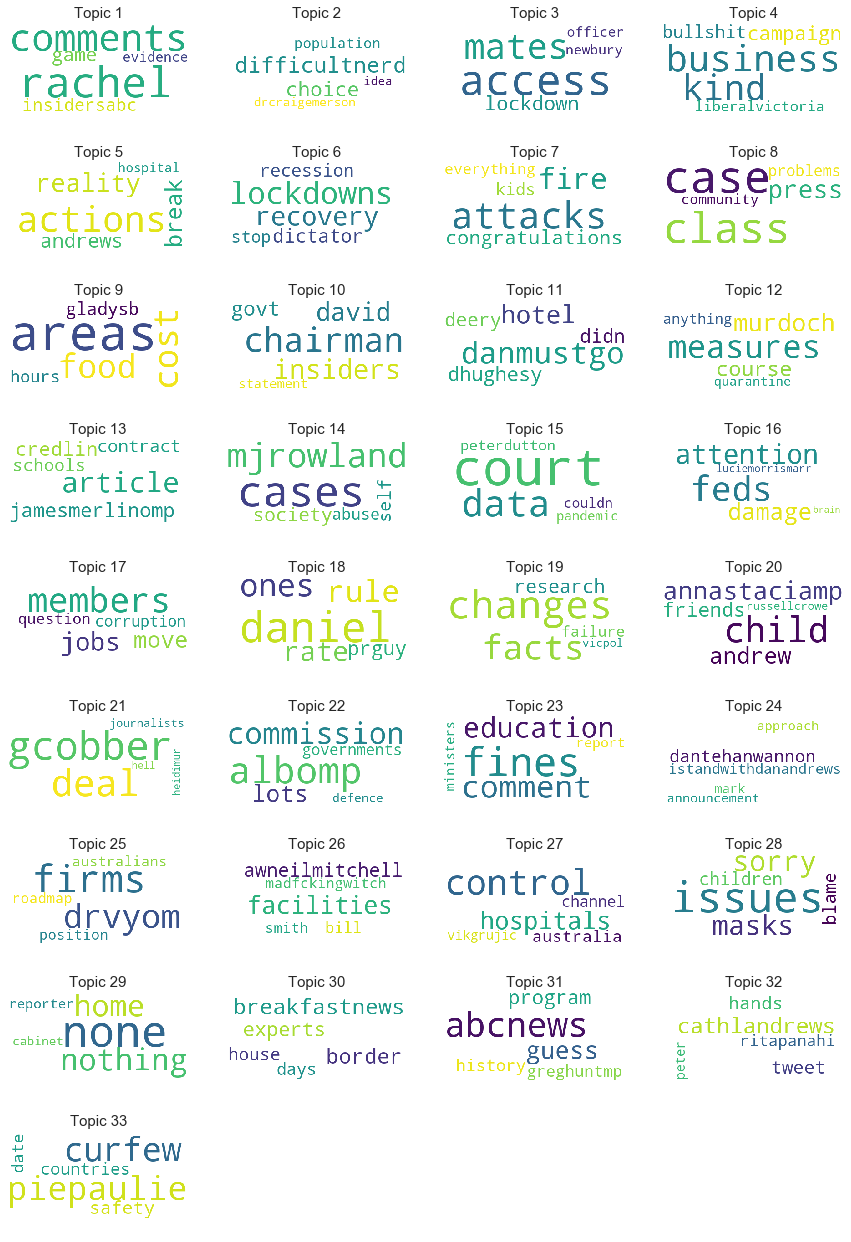

In [184]:
# Import the wordcloud library
from wordcloud import WordCloud
import math

# Initiate a figure for word clouds
rows = math.ceil(33/4)
fig, ax = plt.subplots(rows, 4, figsize=(15,2.5*rows))
[axi.set_axis_off() for axi in ax.ravel()]

for i, comp in enumerate(lda_model.get_topics()):
    terms_comp = zip(ReducedTerm, abs(comp))
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:5] 
    # convert to dictionary type - keep top 10 words
    Word_Frequency = dict(sorted_terms[0:10])
    # generate word cloud
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(Word_Frequency)
    # visualize word cloud in figure
    subfig_Row = math.floor(i/4)
    subfig_Col = math.ceil(i%4)
    ax[subfig_Row,subfig_Col].imshow(wordcloud)
    ax[subfig_Row,subfig_Col].set_title("Topic {}".format(i+1)) 
        
plt.show()

In [185]:
#Getting the Topic for each document
topic_nums = []
for i in range(len(Corpus)):
    try:
        xc = lda_model.get_document_topics(Corpus[i])
        topic_nums.append(int(max(xc, key=lambda xc: xc[1])[0])+1)
    except:
        topic_nums.append(np.NaN)

In [189]:
df['Topic_Nums'] = topic_nums
df['Tweet_Date'] = df['Tweet_Time'].apply(lambda x: x)
df = df[df['Tweet_Date']>="2020-01-25"]
df_1 = df[(df['Topic_Nums'].notna()) & (df['Topic_Nums'].isin([3,6,8,9,12,14,15,26,28]))] #Need to change based word cloud topics 
df.set_index('Tweet_Date', inplace=True)
df_weekly = df.resample('W').count()
df_weekly['Topic_Nums']

#Covid Related Topics
df_1.set_index('Tweet_Date', inplace=True)
df_1_weekly = df_1.resample('W').count()

In [190]:
df_1_weekly['total_tweet_topics'] = df_weekly['Topic_Nums']
df_1_weekly['tweet_topics_sup'] = round((df_1_weekly['Topic_Nums'])/(df_1_weekly['total_tweet_topics']),2)

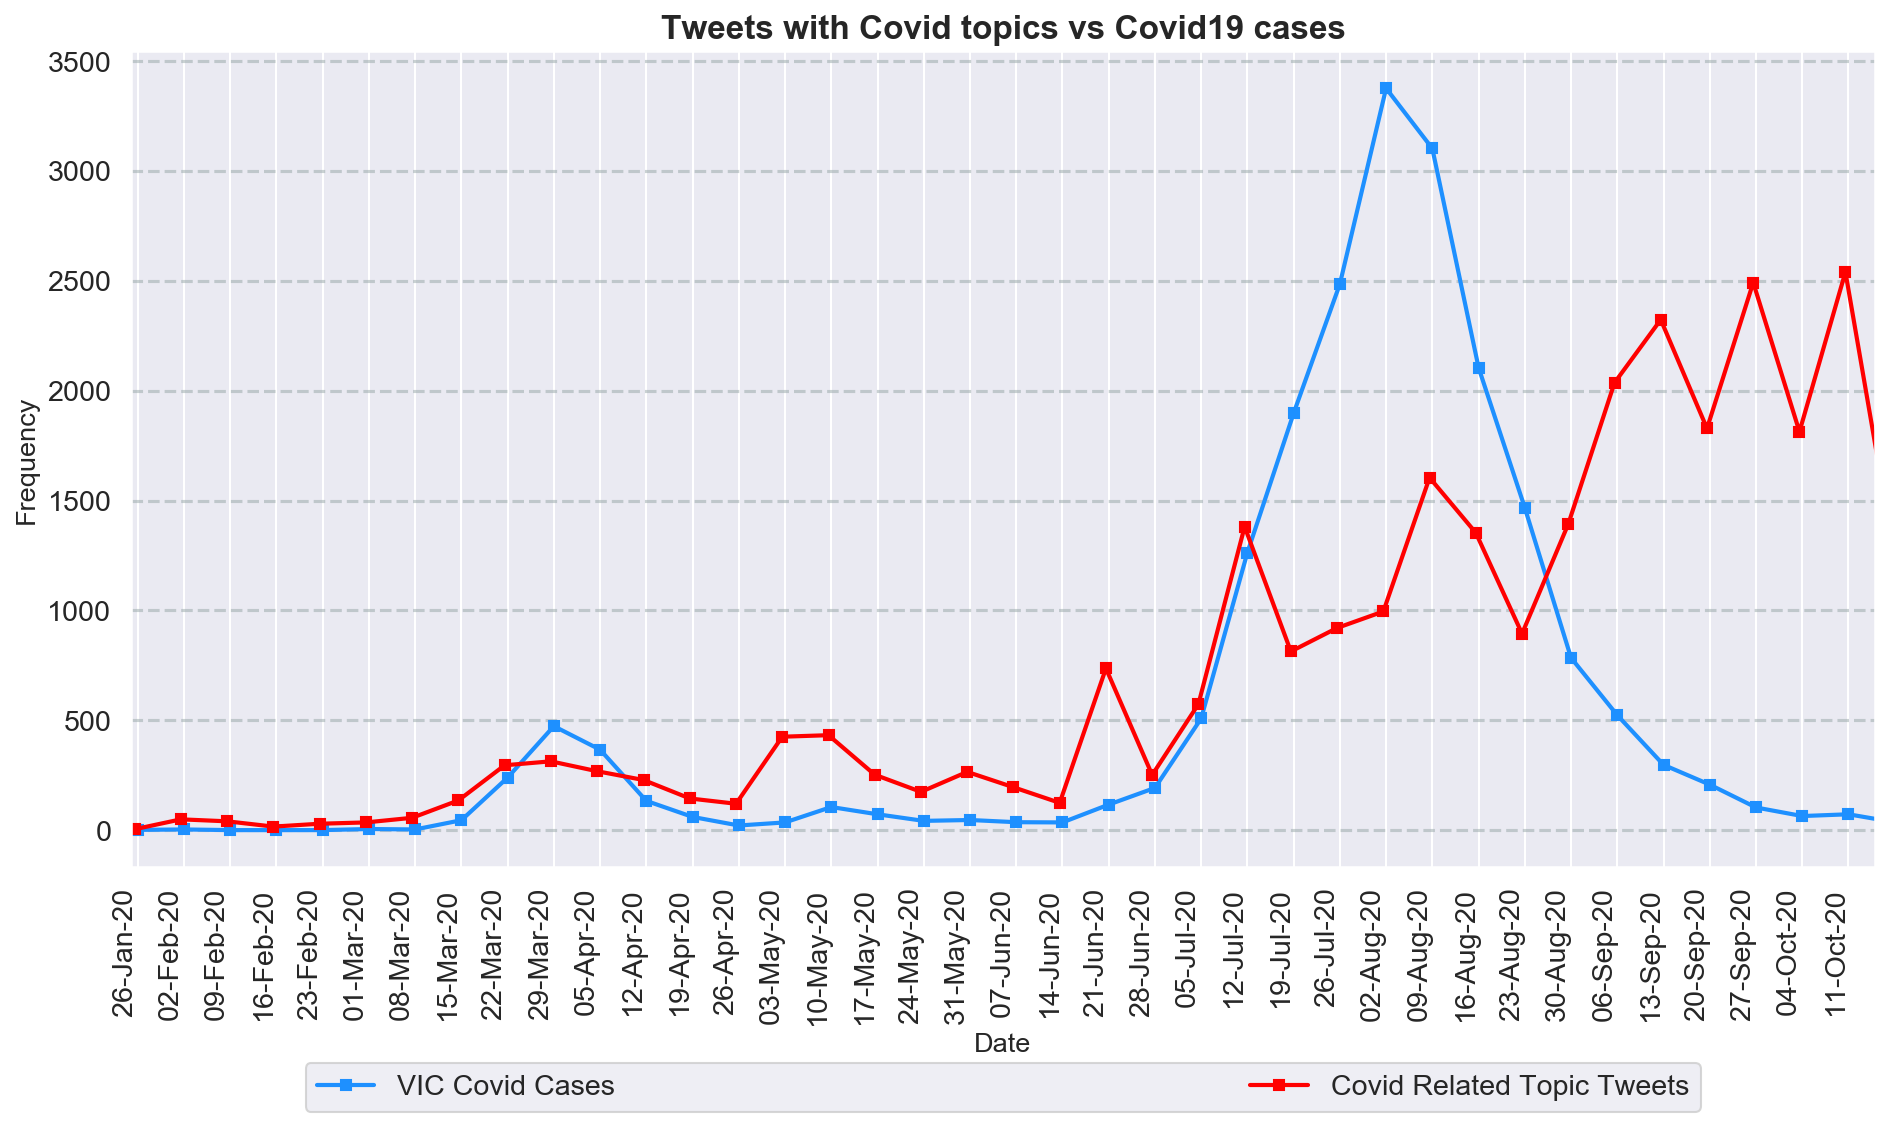

In [192]:
df_covid = pd.read_csv(r"./DataSets/Covid19_Cases_VIC.csv", header=0, index_col=None)
fig, ax = plt.subplots(figsize=(15,8), dpi=150)

df_covid['Date'] = pd.to_datetime(df_covid['Date'], format="%d-%b-%y")

ax.set_xlim(df_covid['Date'][0], df_covid['Date'][len(df_covid)-1])
ax.xaxis.set_major_locator(DayLocator(interval=7))
ax.xaxis.set_major_formatter(DateFormatter('%d-%b-%y'))
ax.fmt_xdata = DateFormatter('%d-%b-%y')
fig.autofmt_xdate(rotation=90)

df_covid.set_index('Date', inplace=True)
df_weekly = df_covid.resample('W').sum()
min_cases = min(df_weekly['VIC'])
max_cases = max(df_weekly['VIC'])

df_weekly['norm_cases'] = df_weekly['VIC'].apply(lambda x: round((x-min_cases)/(max_cases-min_cases),2))

ax.plot(df_weekly.index,df_weekly['VIC'], marker='s', markerfacecolor='dodgerblue', markersize=5, color='dodgerblue', linewidth=2, label = 'VIC Covid Cases')
ax.plot(df_1_weekly.index,df_1_weekly['Topic_Nums'],marker='s', markerfacecolor='red', markersize=5, color='red', linewidth=2, label = 'Covid Related Topic Tweets')
ax.grid(color='#95a5a6', linestyle='--', linewidth=1.5, axis='y', alpha=0.5)
ax.legend(loc=8, bbox_to_anchor=(0.1, -.300, 0.8, -.102), ncol=3, mode="expand", borderaxespad=0.)
plt.xlabel("Date", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.title("Tweets with Covid topics vs Covid19 cases", fontsize=16, fontweight='bold')
plt.show()

<a id = "cell_Practicalimplication"></a>
### 5. Practical Implication


From the Analysis, it was clearly seen that the people lives have been impacted significantly becuase of the Covid-19 outbreaks. Not only has it changed how people move out of their houses but more importantly how people think as well. This is why it becomes increasingly important to use this analysis for bringing the best of the resources that we have. These outbreaks can create distress and fear among the population as well. Seeing the tweets data in the Data exploration section, we know people are more active on social media during the lockdown, on Sundays and between 11 am to 1pm. Therefore, more positive and important feeds should be broadcasted by the government during those time. It would not only make people aware about current updates but also create the positivity among them. As the use of social media is independent, there are chances of fake-news and hate speech, which also impacts people's sentiments. This calls for implementing surveillance systems to mitigate such posts from being created.

It was also evident that the Victorian people have been supportive towards the premier through these two covid waves. Therefore, the steps for the welfare of people to protect them from any kind of harm has been taken positively by the people and should be continued. The government can use social media and other broadcasting channels to update the people with latest information.

More emergency services should offered and reachability of these services should also be made available through social media. Programs should be developed to train childrens making them learn healthy santization habits. We are all together in this and these measures would lead us to a better and covid free future.

### References: 

1. Matplotlib.org. 2021. User's Guide — Matplotlib 3.4.3 documentation. [online] Available at: <https://matplotlib.org/stable/users/index.html> [Accessed 6 August 2021].

2. Docs.python.org. 2021. datetime — Basic date and time types — Python 3.9.6 documentation. [online] Available at: <https://docs.python.org/3/library/datetime.html#datetime.tzinfo> [Accessed 10 August 2021].

3. Mohamed Ridhwan, K. and Hargreaves, C., 2021. Leveraging Twitter data to understand public sentiment for the COVID‐19 outbreak in Singapore. International Journal of Information Management Data Insights, 1(2), p.100021.

4. GeeksforGeeks. 2021. How to convert date and time with different timezones in Python? - GeeksforGeeks. [online] Available at: <https://www.geeksforgeeks.org/how-to-convert-date-and-time-with-different-timezones-in-python/> [Accessed 12 August 2021].

5. Medium. 2021. Topic Modelling in Python with NLTK and Gensim. [online] Available at: <https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21> [Accessed 12 August 2021].